<a href="https://colab.research.google.com/github/NadjaNovicic/Masinsko-ucenje/blob/main/vezbanje.potrebno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Potrebne biblioteke


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

## Unos i prikaz podataka

In [ ]:
data = pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Vizuelni prikaz postojecih i nepostojecih podaka u kolonama


<Axes: >

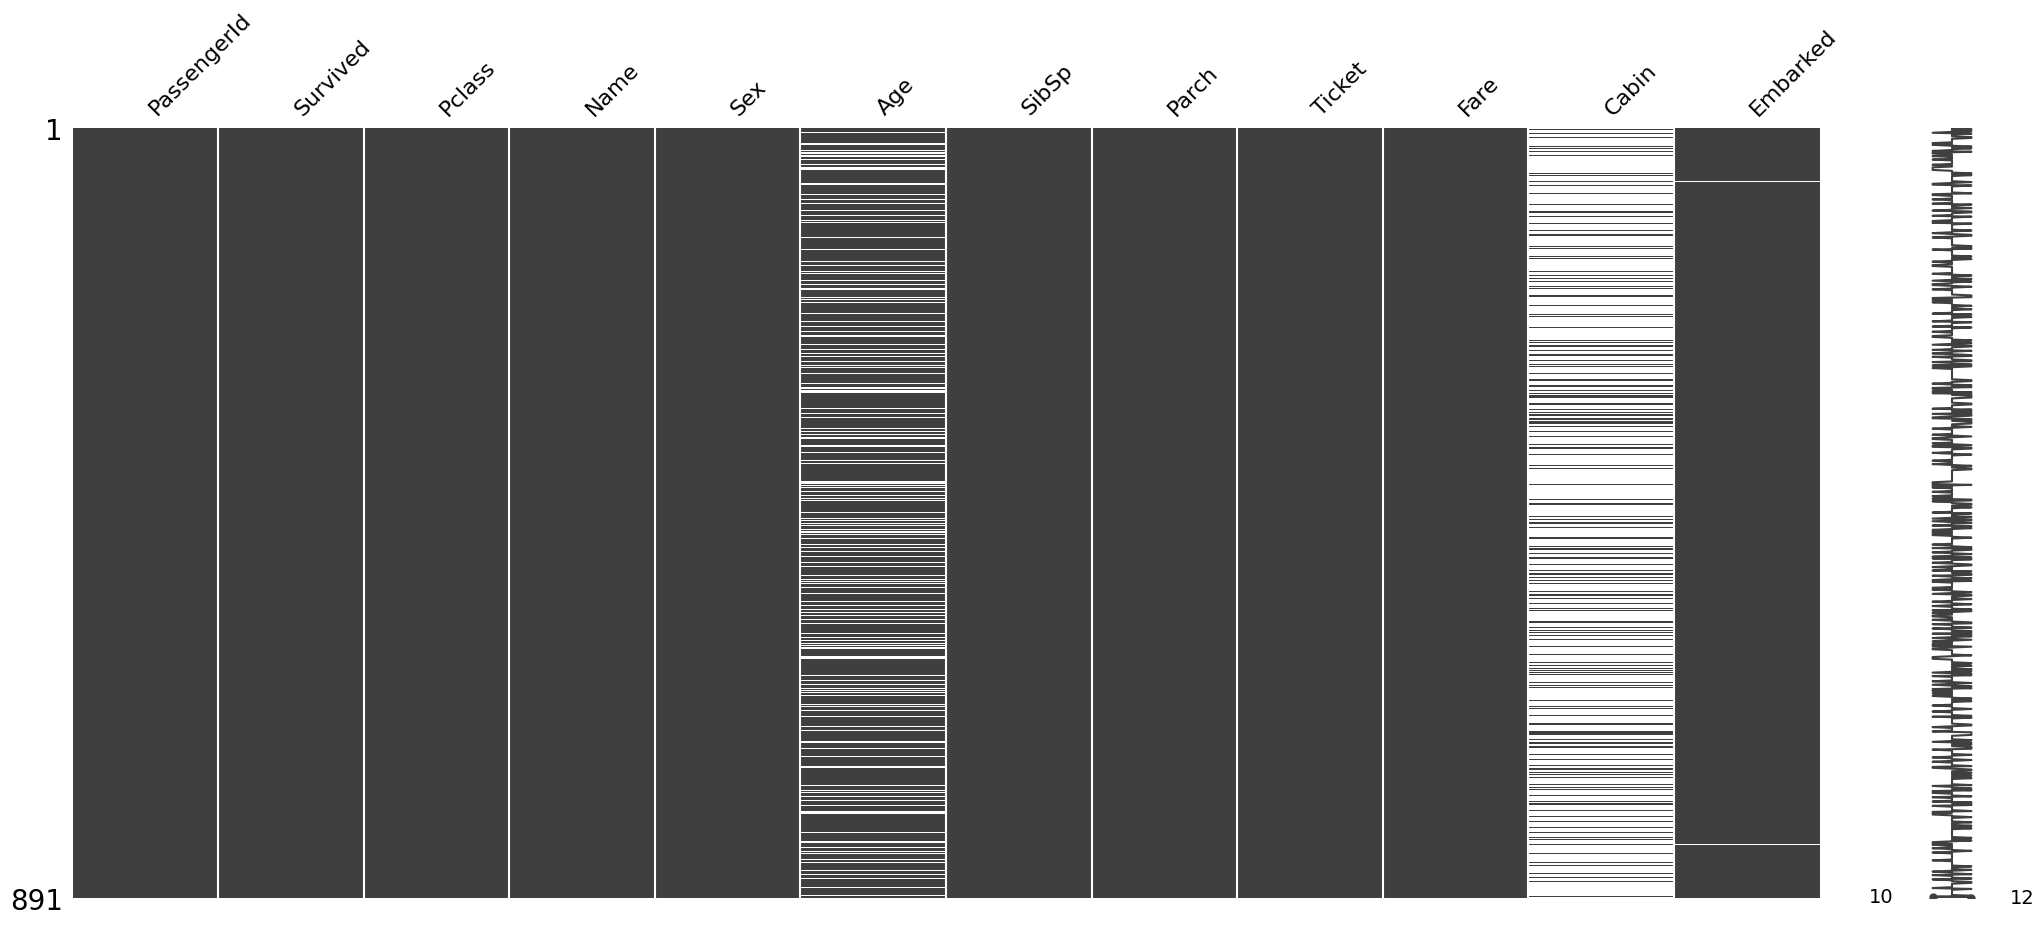

In [ ]:
msno.matrix(data)


##Za cabin pretvaram u true i false ,a za age popunjavam nepostojece sa medijanom, takodje komentarisano je brisanje reda gde nema podatako o god

In [ ]:
data['Has Cabin'] = data['Cabin'].isna().apply(lambda x: not x)
data['Age'] = data['Age'].fillna(data['Age'].median())
#data=data.dropna(subset=['Age'])
data.drop(columns=["Cabin"], inplace=True)

##Korelaciona matrica

<ipython-input-233-a5178bfb4a30>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


<Axes: >

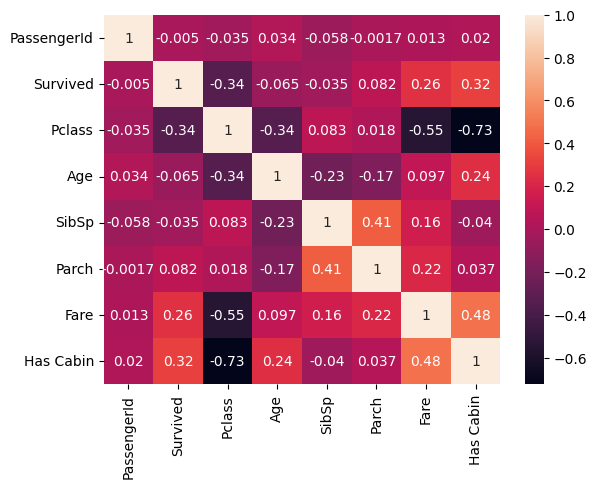

In [ ]:
import seaborn as sns
cor = data.corr()
sns.heatmap(cor, annot=True)

##Prikaz koeficijenata korelacije izmedju nezavisniih i zavisnih promenljivih

In [ ]:
import seaborn as sns
cor = data.corr().iloc[1]
display(cor)

<ipython-input-234-0dfe3b41cb7b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr().iloc[1]


PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.064910
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Has Cabin      0.316912
Name: Survived, dtype: float64

##Izbacivanje kolona koje ne uticu

In [ ]:
data.drop(columns=["Age","PassengerId" , "SibSp","Parch"], inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Ticket,Fare,Embarked,Has Cabin
0,0,3,"Braund, Mr. Owen Harris",male,A/5 21171,7.2500,S,False
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,71.2833,C,True
2,1,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,7.9250,S,False
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,53.1000,S,True
4,0,3,"Allen, Mr. William Henry",male,373450,8.0500,S,False


<Axes: >

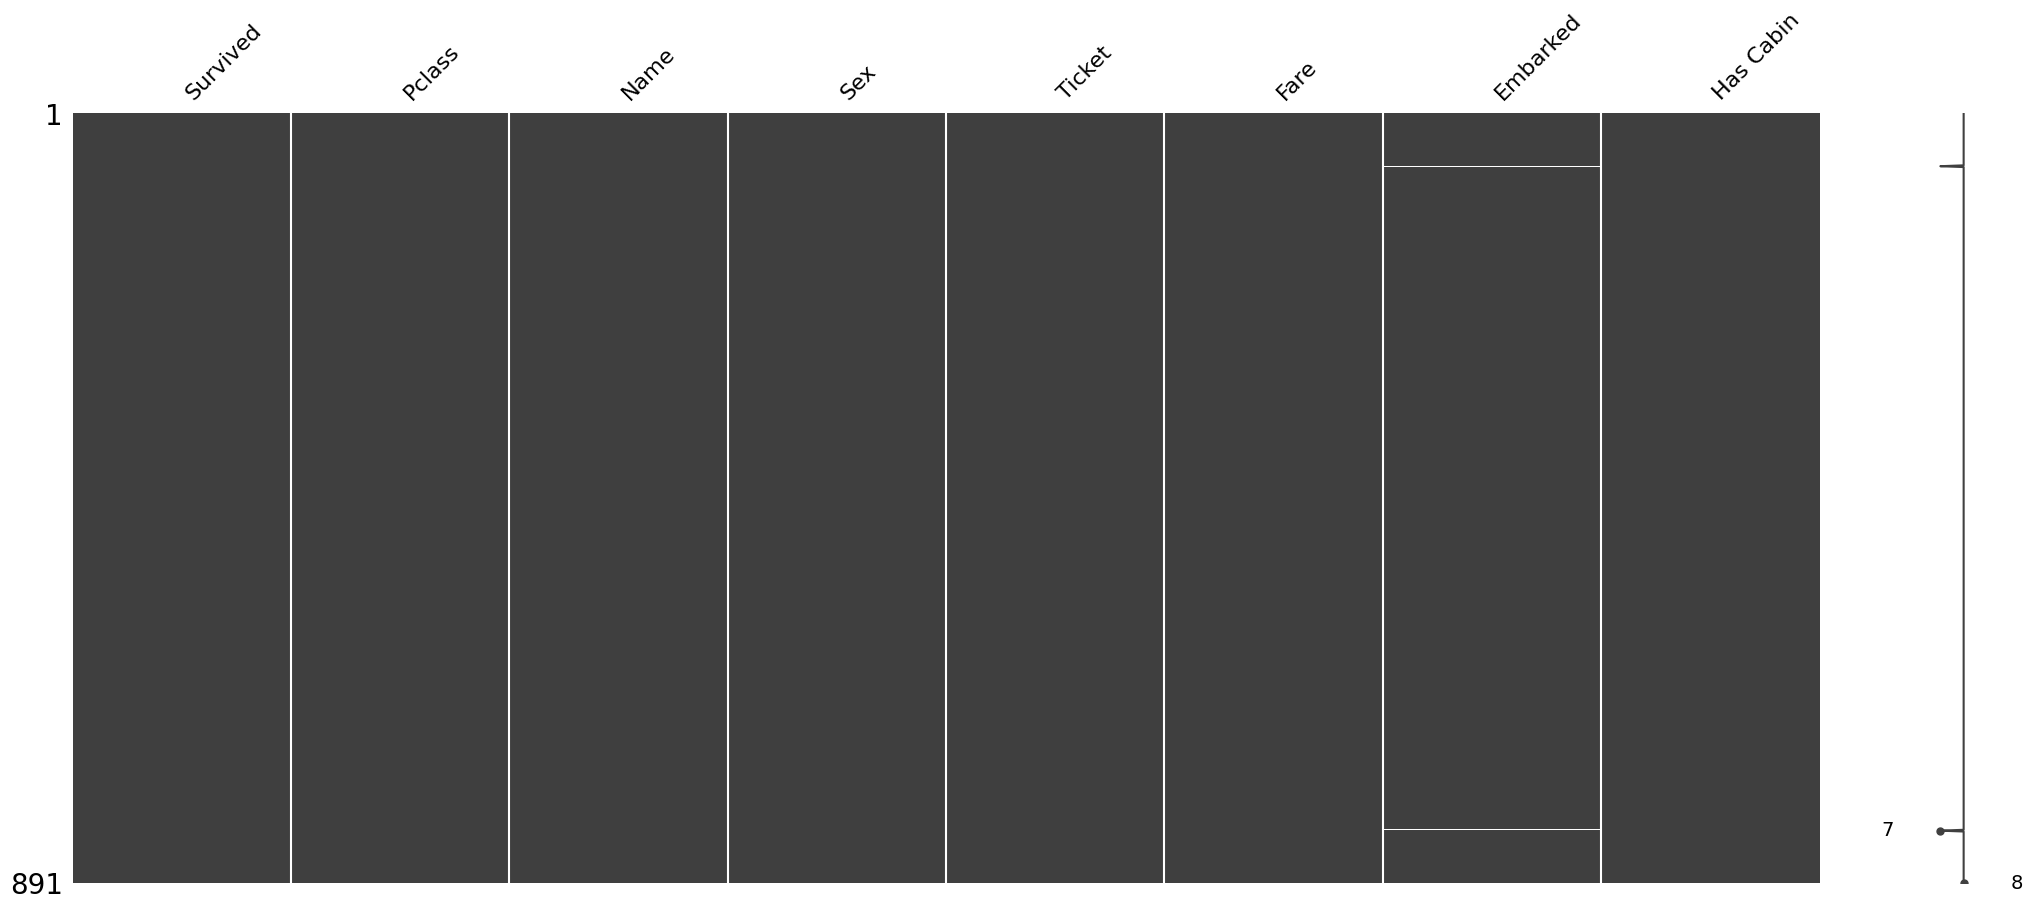

In [ ]:
msno.matrix(data)

##One hot endcoding(prebacivanje u nula i jedan)

In [ ]:
data = pd.get_dummies(data, columns=['Sex','Has Cabin'], drop_first=True)
data.head()

,Survived,Pclass,Name,Ticket,Fare,Embarked,Sex_male,Has Cabin_True
0,0,3,"Braund, Mr. Owen Harris",A/5 21171,7.2500,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,71.2833,C,0,1
2,1,3,"Heikkinen, Miss. Laina",STON/O2. 3101282,7.9250,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,53.1000,S,0,1
4,0,3,"Allen, Mr. William Henry",373450,8.0500,S,1,0


## Trening test split i metrike za jednu nezavisnu promenljivu koja najvise utice na zavisnu

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model = LogisticRegression()

train, test = train_test_split(data, test_size=0.2, random_state=42)
print(len(train))
print(len(test))
model.fit(X=train[['Pclass']], y=train['Survived'])
y_pred = model.predict(X=test[['Pclass']])
y_true = test[['Survived']]

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

712
179
              precision    recall  f1-score   support

           0       0.71      0.85      0.77       105
           1       0.70      0.50      0.58        74

    accuracy                           0.70       179
   macro avg       0.70      0.67      0.68       179
weighted avg       0.70      0.70      0.69       179



##KNN za nezavisnu promenljivu koja najvise utice na zavisnu (kada trazimo najbolje k)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

train, test = train_test_split(data, test_size=0.2, random_state=42)
Xtrain=train[['Pclass']]
ytrain=train[['Survived']]
ks = [x for x in range(1, 15, 2)]

models = [KNeighborsClassifier(n_neighbors=k) for k in ks]

for model in models:
  print(f"k = {model.get_params()['n_neighbors']}")
  model.fit(Xtrain, ytrain)
  y_pred = model.predict(X=test[['Pclass']])
  y_true = test[['Survived']]
  print(classification_report(y_true, y_pred))

k = 1
              precision    recall  f1-score   support

           0       0.71      0.85      0.77       105
           1       0.70      0.50      0.58        74

    accuracy                           0.70       179
   macro avg       0.70      0.67      0.68       179
weighted avg       0.70      0.70      0.69       179

k = 3
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       105
           1       0.00      0.00      0.00        74

    accuracy                           0.59       179
   macro avg       0.29      0.50      0.37       179
weighted avg       0.34      0.59      0.43       179

k = 5
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       105
           1       0.00      0.00      0.00        74

    accuracy                           0.59       179
   macro avg       0.29      0.50      0.37       179
weighted avg       0.34      0.59      0.43       179

k

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 

##KNN za vec definisano k

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


model = KNeighborsClassifier(n_neighbors=11)

train, test = train_test_split(data, test_size=0.2, random_state=42)

X = train[['Pclass']]
y = train['Survived']


model.fit(X, y)
y_pred = model.predict(X=test[['Pclass']])
y_true = test[['Survived']]

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       105
           1       0.59      0.69      0.64        74

    accuracy                           0.68       179
   macro avg       0.67      0.68      0.67       179
weighted avg       0.69      0.68      0.68       179

